In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import random
import time
import argparse
from bs4 import BeautifulSoup

In [42]:
boardgames = pd.read_csv('../data/boardgames.csv')

In [43]:
#boardgames.set_index('id', inplace=True)
boardgames

,rank,name,id,links,num_voters
0,104.0,Pandemic,30549,/boardgame/30549/pandemic,104891
1,184.0,Carcassonne,822,/boardgame/822/carcassonne,104530
2,408.0,Catan,13,/boardgame/13/catan,103960
3,71.0,7 Wonders,68448,/boardgame/68448/7-wonders,86475
4,101.0,Dominion,36218,/boardgame/36218/dominion,79469
...,...,...,...,...,...
44995,NaN,Silent But Deadly,138578,/boardgame/138578/silent-deadly,10
44996,NaN,Hull Breach: In Defiance of Dictators,138730,/boardgame/138730/hull-breach-defiance-dictators,10
44997,NaN,Wahrheit oder Blödsinn?,139581,/boardgame/139581/wahrheit-oder-blodsinn,10
44998,NaN,Zombie Shuffle,139637,/boardgame/139637/zombie-shuffle,10


In [44]:
boardgames['num_voters'].min()

10

In [45]:
boardgames['num_voters'].mean()

456.43926666666664

In [46]:
boardgames['num_voters'].median()

49.0

In [47]:
boardgames['num_voters'].sum()

20539767

<AxesSubplot:>

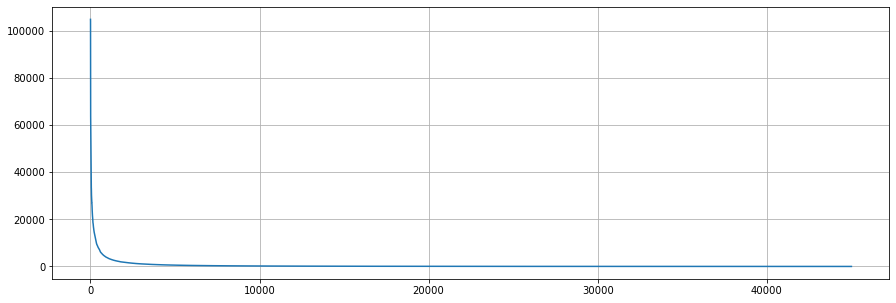

In [49]:
boardgames['num_voters'].plot(figsize=(15,5), grid=True)

<AxesSubplot:>

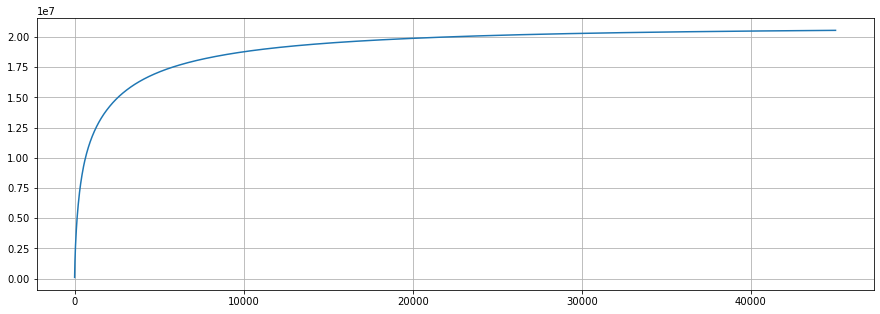

In [50]:
boardgames['num_voters'].cumsum().plot(figsize=(15,5), grid=True)

In [58]:
boardgames = boardgames.set_index('id')

In [101]:
b_id = 125618
print(boardgames.loc[:b_id]['num_voters'].sum())
print(boardgames.loc[:b_id]['num_voters'].count())

6982749
278


In [3]:
ratings = pd.read_csv('../data/ratings_cleaned.csv')

In [14]:
ratings.shape

(20484318, 3)

In [12]:
ratings.head()

,boardgame_id,ratings,user_id
0,30549,10.0,214
1,822,10.0,214
2,13,10.0,214
3,68448,10.0,214
4,36218,10.0,214


In [13]:
ratings.tail()

,boardgame_id,ratings,user_id
20484313,157894,10.0,263045
20484314,174474,10.0,263045
20484315,151978,10.0,263045
20484316,224164,10.0,263045
20484317,271265,10.0,263045


In [17]:
ratings[ratings['boardgame_id']==306882].sort_values('ratings', ascending=False)

,boardgame_id,ratings,user_id
36698,306882,10.0,15978
1405700,306882,10.0,3377
1871061,306882,10.0,7216
15069519,306882,10.0,88039
15083730,306882,10.0,92668
...,...,...,...
13607238,306882,5.0,205
6997094,306882,5.0,5278
3740199,306882,4.0,1351
16827916,306882,1.0,123871


In [5]:
users = pd.read_csv('../data/users.csv')
users.head()

,user_name,num_ratings,user_id
0,Walt Mulder,8675,0
1,Doel,8599,1
2,TomVasel,7052,2
3,warta,6902,3
4,jmdsplotter,6210,4


In [7]:
users.tail()

,user_name,num_ratings,user_id
398894,NickFury,1,398894
398895,ploci,1,398895
398896,plntgntprncsfbldryl,1,398896
398897,gregoryvit,1,398897
398898,Yoshipl,1,398898


In [9]:
users.shape

(398899, 3)

<AxesSubplot:>

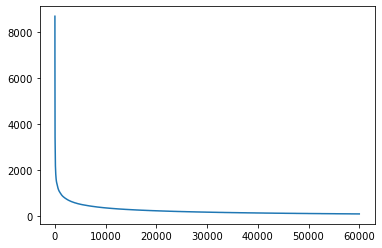

In [11]:
users.loc[:60000,'num_ratings'].plot()

In [95]:
users = pd.DataFrame(ratings.value_counts('user_name'), columns=['num_ratings'])

In [96]:
users['user_id'] = range(0,len(users))
users

,num_ratings,user_id
user_name,,
Doel,208,0
squaredeh,187,1
RonCarlson01,178,2
arsior,164,3
tugurio77,162,4
...,...,...
kziel,1,306748
Zerase,1,306749
kzkedzierska,1,306750


In [3]:
boardgames_ext = pd.read_csv('../data/boardgames_extend.csv')
boardgames_ext.head()

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
0,30549,104.0,Pandemic,/boardgame/30549/pandemic,104891,Medical,"Action Points, Cooperative Game, Hand Manageme...","Components: Map (Global Scale), Components: Mu...",Pandemic: Gen Con 2016 Promos – Z-Force Team M...,NaN,Matt Leacock,"Z-Man Games, Inc., (Unknown), Albi, Asmodee, A..."
1,822,184.0,Carcassonne,/boardgame/822/carcassonne,104530,"City Building, Medieval, Territory Building","Area Majority / Influence, Map Addition, Tile ...","Cities: Carcassonne (France), Components: Meep...","20 Jahre Darmstadt Spielt, Apothecaries (fan e...",Carcassonne: Wheel of Fortune,Klaus-Jürgen Wrede,"Hans im Glück, 999 Games, Albi, Bard Centrum G..."
2,13,408.0,Catan,/boardgame/13/catan,103960,"Economic, Negotiation","Dice Rolling, Hexagon Grid, Income, Modular Bo...","Animals: Sheep, Components: Hexagonal Tiles, C...","20 Jahre Darmstadt Spielt, Brettspiel Adventsk...",NaN,Klaus Teuber,"KOSMOS, 999 Games, Albi, Astrel Games, Bergsal..."
3,68448,71.0,7 Wonders,/boardgame/68448/7-wonders,86475,"Ancient, Card Game, City Building, Civilizatio...","Drafting, Hand Management, Set Collection, Sim...","Digital Implementations: Board Game Arena, Gam...","7 Wonders: Armada, 7 Wonders: Babel, 7 Wonders...",NaN,Antoine Bauza,"Repos Production, ADC Blackfire Entertainment,..."
4,36218,101.0,Dominion,/boardgame/36218/dominion,79469,"Card Game, Medieval","Deck, Bag, and Pool Building, Delayed Purchase...","Crowdfunding: Wspieram, Game: Dominion, Misc: ...","Ancient Times (fan expansion for Dominion), An...",Dominion: Intrigue,Donald X. Vaccarino,"Rio Grande Games, 999 Games, Albi, Bard Centru..."


In [4]:
boardgames_ext.shape

(45000, 12)

In [6]:
boardgames_ext['categories'].isna().sum()

554

In [8]:
boardgames_ext[boardgames_ext.duplicated()]

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
2600,1561,2688.0,Clue Master Detective,/boardgame/1561/clue-master-detective,1310,"Deduction, Murder/Mystery","Memory, Paper-and-Pencil, Roll / Spin and Move","Game: Cluedo / Clue (Parker Brothers, et al)",NaN,NaN,(Uncredited),"Hasbro, Parker Brothers, Waddingtons, Winning ..."
11200,266950,NaN,Nemo's War (Second Edition): Bold and Caring E...,/boardgameexpansion/266950/nemos-war-second-ed...,168,"Adventure, Expansion for Base-game, Exploratio...","Action Points, Area Majority / Influence, Area...","Authors: Jules Verne, Crowdfunding: Kickstarte...",Nemo's War (Second Edition),NaN,Chris Taylor (I),"Frosted Games, Victory Point Games"
11402,68250,6871.0,Objective: Kiev,/boardgame/68250/objective-kiev,163,"Wargame, World War II",Hexagon Grid,"Cities: Kiev (Ukraine), Magazine: C3i, Players...",Objective: Odessa,NaN,Frank Chadwick,"GMT Games, RBM Studio, Victory Point Games"
11403,90198,NaN,Killer Bunnies and the Quest for the Magic Car...,/boardgameexpansion/90198/killer-bunnies-and-q...,163,"Card Game, Expansion for Base-game, Humor, Neg...","Dice Rolling, Hand Management, Take That, Trading","Animals: Rabbits, Game: Killer Bunnies",Killer Bunnies and the Quest for the Magic Carrot,NaN,Jeffrey Neil Bellinger,Playroom Entertainment
11600,22160,NaN,"EuroFront: The War in Europe, 1936-45 – Second...",/boardgameexpansion/22160/eurofront-war-europe...,158,"Expansion for Base-game, Wargame, World War II","Dice Rolling, Hexagon Grid, Secret Unit Deploy...","Components: Block Wargames, Series: Front Seri...",EastFront: The War in Russia 1941-45 – Second ...,NaN,Craig Besinque,Columbia Games
11604,102582,NaN,Defenders of the Realm: Global Effects Cards,/boardgameexpansion/102582/defenders-realm-glo...,158,"Adventure, Expansion for Base-game, Fantasy, F...","Action Points, Cooperative Game, Dice Rolling,...","Game: Defenders of the Realm, Promotional: BGG...",Defenders of the Realm,NaN,Richard Launius,Eagle-Gryphon Games
11901,104410,NaN,Ascension: Chronicle of the Godslayer – Void M...,/boardgameexpansion/104410/ascension-chronicle...,151,"Card Game, Expansion for Base-game, Fantasy","Card Drafting, Deck, Bag, and Pool Building, S...",Game: Ascension Deck Building,"Ascension: Deckbuilding Game, Ascension: Retur...",NaN,Justin Gary,"Arclight, Asmodee, FunBox Jogos, Stone Blade E..."
11902,124601,NaN,Nightfall: Dark Rages,/boardgameexpansion/124601/nightfall-dark-rages,151,"Card Game, Expansion for Base-game, Fantasy, F...","Card Drafting, Deck, Bag, and Pool Building, H...",Game: Nightfall,"Nightfall, Nightfall: Eastern Skies, Nightfall...",NaN,David Gregg,Alderac Entertainment Group
12101,21046,NaN,Die Siedler von Catan: Atlantis – Szenarien & ...,/boardgameexpansion/21046/die-siedler-von-cata...,147,"Expansion for Base-game, Negotiation","Dice Rolling, Hand Management, Modular Board, ...","Game: Catan, Mythology: Atlantis",Catan,NaN,"Fritz Gruber, Stefan Risthaus, Stefan Rose, Ba...","Albi, KOSMOS"
12502,12233,NaN,Warhammer (Fourth Edition): Battle Magic,/boardgameexpansion/12233/warhammer-fourth-edi...,139,"Expansion for Base-game, Fantasy, Miniatures, ...","Modular Board, Variable Player Powers","Players: Two Player Only Games, Setting: Warha...","Warhammer Armies (Fourth Edition): Chaos, Warh...",NaN,"Andy Chambers, Rick Priestley",Games Workshop Ltd.


In [9]:
boardgames_ext[boardgames_ext['name']=='Schmovie']

,id,rank,name,links,num_voters,categories,mechanics,family,expansions,integrations,designers,publishers
14096,137968,12252.0,Schmovie,/boardgame/137968/schmovie,114,Party Game,Voting,NaN,Schmovie: Table Top Day 2016 Felicia and Wil S...,NaN,"Sara Farber, Bryan Wilson",Galactic Sneeze
14102,137968,12252.0,Schmovie,/boardgame/137968/schmovie,114,Party Game,Voting,NaN,Schmovie: Table Top Day 2016 Felicia and Wil S...,NaN,"Sara Farber, Bryan Wilson",Galactic Sneeze


In [10]:
boardgames_ext = boardgames_ext.drop_duplicates('id')

In [11]:
boardgames_ext.shape

(44855, 12)

In [12]:
boardgames_ext.to_csv('../data/boardgames_extend.csv')

In [13]:
users = pd.read_csv('../data/users.csv')
users.head()

,user_name,num_ratings,user_id
0,Walt Mulder,8675,0
1,Doel,8599,1
2,TomVasel,7052,2
3,warta,6902,3
4,jmdsplotter,6210,4
